# Volume 3: Pandas 5 (GeoPandas) 
    <Name> Ethan Williams
    <Class> Section 1
    <Date> october 29th

In [1]:
import geopandas
from matplotlib import pyplot as plt


import numpy as np
import pandas as pd
from shapely.geometry import Point

## Problem 1

Read in the file *airports.csv* as a pandas dataframe. Convert the dataframe into a geopandas dataframe.

Find the distance between the following airports:
1. Halifax / CFB Shearwater Heliport (Halifax, Canada) to Murtala Muhammed International Airport (Lagos, Nigeria)
2. Don Mueang International Airport (Bangkok, Thailand) and Beijing Capital International Airport (Beijing, China)
3. Salt Lake City International Airport (Salt Lake City, USA) and Auckland International Airport (Auckland, New Zealand)

In [8]:
air = pd.read_csv("airports.csv",header = 0)
#convert the longitude and latitude into cartesean coordinates
air.Latitude = (air.Latitude+90)*np.pi/180
air.Longitude = (air.Longitude)*np.pi/180
erf = 3958.8
#make a list of the tupled x y and z coordinates
air["Coordinates"] = list(zip(3958.8*np.cos(air.Longitude)*np.sin(air.Latitude),3958.8*np.sin(air.Longitude)*np.sin(air.Latitude),erf*np.cos(air.Latitude)))
#make each of the points a Point shapely object
air["Coordinates"] = air['Coordinates'].apply(Point)
#create the geopandas dataframe from the original dataframe
gda = geopandas.GeoDataFrame(air,geometry="Coordinates")
gda.index = gda["Name"]
#get the info on just the airports wanted
halifax = gda.loc["Halifax / CFB Shearwater Heliport"]
nigeria = gda.loc["Murtala Muhammed International Airport"]
don = gda.loc["Don Mueang International Airport"]
slc = gda.loc["Salt Lake City International Airport"]
bej = gda.loc["Beijing Capital International Airport"]
auck = gda.loc["Auckland International Airport"]
#return the distances each airport is to the other
dist1 = halifax["Coordinates"].distance(nigeria["Coordinates"])
dist2 = don["Coordinates"].distance(bej["Coordinates"])
dist3 = auck["Coordinates"].distance(slc["Coordinates"])
dist1,dist2,dist3

#print(Halifax['Coordinates'].distance(Nigeria["Coordinates"]))
#dist = gda["Halifax / CFB Shearwater Heliport (Halifax, Canada)"].distance("Murtala Muhammed International Airport (Lagos, Nigeria)")
#print(dist)

(3831.4836549397683, 1249.5174085360002, 3675.5724139509057)

## Problem 2
Read in the built-in GeoDataFrame *naturalearth_lowres*.
Create a GeoDataFrame that only contains information about the southern hemisphere.
Use this data to find the country with the smallest and largest area in the southern hemisphere.
Dissolve this GeoDataFrame to find the continent with the largest and smallest area in the southern hemisphere.

In [28]:
south = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
#take only the southern hemisphere with cx 
menthol = south.cx[:,:0]
#make a new column area based on the bounds in geometry
menthol["area"] = menthol["geometry"].area
#get the largest and smallest area and then print those geopandas series
biggest = menthol["area"].idxmax()
smallest = menthol["area"].idxmin()
print(south.iloc[biggest])
print(south.iloc[smallest])

pop_est                                                    4050
continent                                            Antarctica
name                                                 Antarctica
iso_a3                                                      ATA
gdp_md_est                                                  810
geometry      (POLYGON ((-48.66061601418252 -78.047018731598...
Name: 159, dtype: object
pop_est                                                  282814
continent                                               Oceania
name                                                    Vanuatu
iso_a3                                                      VUT
gdp_md_est                                                  723
geometry      (POLYGON ((167.2168013857696 -15.8918462053084...
Name: 89, dtype: object


/home/ethan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Problem 3

Using the built-in GeoDataFrame *naturalearth_lowres* and GeoPlots, create population density plots for Asia and South America.
Use Mercator maps.

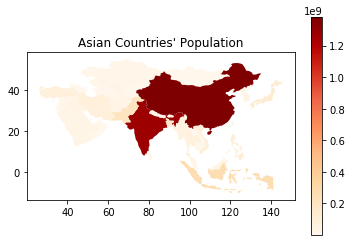

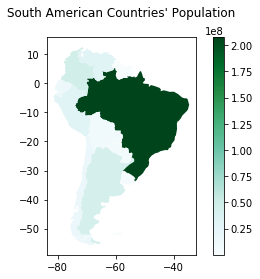

In [36]:
south = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
#all asian and south american countries
asia = south[south["continent"]=="Asia"]
southam = south[south["continent"]=="South America"]
#convert the crs
asia.to_crs({'init': 'epsg:3395'})
southam.to_crs({'init': 'epsg:3395'})
#plot the results to nice maps
asia.plot(column='pop_est',cmap='OrRd',legend=True)
plt.title("Asian Countries' Population")
plt.show()
southam.plot(column='pop_est',cmap='BuGn',legend=True)
plt.title("South American Countries' Population\n")
plt.show()



## Problem 4

Merge the airports GeoDataFrame and the *naturalearth_lowres* GeodataFrame on their spatial data. Use this new GeoDataFrame to find the airport in the country with the smallest population estimate.

In [9]:
south = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
air = pd.read_csv("airports.csv",header = 0)
air["Coordinates"] = list(zip(air["Longitude"],air["Latitude"]))
air["Coordinates"] = air["Coordinates"].apply(Point)
#make the airport pandas dataframe into a geodataframe based on longitude and latitude
air = geopandas.GeoDataFrame(air,geometry="Coordinates")
#assigne a crs
air.crs={'init': 'epsg:3395'}
south.crs={'init': 'epsg:3395'}
#inner join the two geopandas dataframes
comb = geopandas.sjoin(air,south,how='inner',op="intersects")
#find the index of the least populated airport
a = comb["pop_est"].idxmin()
#print the name of that airport
print(comb.loc[a].Name)

Mount Pleasant Airport
